In [ ]:
%config IPCompleter.use_jedi = False

In [ ]:
!pip install pyreadline

In [3]:
import os
os.chdir('F:/Sandeep/SANDEEP DOCS/DLCVNLP/Ineuron-ANN-main')

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df1 = pd.get_dummies(df[['Geography','Gender']],drop_first = True)

In [8]:
df = pd.concat([df,df1],axis = 1)

In [9]:
df.drop(['Geography','Gender'],axis = 1,inplace = True )

In [10]:
df.shape

(10000, 15)

In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [11]:
X = df.iloc[:,3:].drop(['Exited'],axis = 1)

In [12]:
y = df['Exited']

In [15]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_trainf,X_test,y_trainf,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train,X_valid,y_train,y_valid = train_test_split(X_trainf,y_trainf,test_size = 0.30,random_state = 0)

In [16]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_valid = st.transform(X_valid)
X_test = st.transform(X_test)

In [54]:
def body_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dense(1, activation = 'sigmoid'))
                  
        model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])), 
                      metrics = ['accuracy'])
  
        return model
        

In [61]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [56]:
tuner = RandomSearch(
          body_model,
          objective = 'val_accuracy',
          max_trials = 5,
          executions_per_trial = 3,
          directory='projetc3',
          project_name='Churn'
          
)

In [57]:
tuner.search(X_train,y_train,epochs = 5,validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.8597222169240316

Best val_accuracy So Far: 0.8605555494626363
Total elapsed time: 00h 00m 26s
INFO:tensorflow:Oracle triggered exit


In [58]:
tuner.results_summary()

Results summary
Results in projetc3\Churn
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 352
learning_rate: 0.01
Score: 0.8605555494626363
Trial summary
Hyperparameters:
num_layers: 5
units_0: 416
learning_rate: 0.01
Score: 0.8601388931274414
Trial summary
Hyperparameters:
num_layers: 9
units_0: 352
learning_rate: 0.001
Score: 0.8597222169240316
Trial summary
Hyperparameters:
num_layers: 16
units_0: 256
learning_rate: 0.01
Score: 0.85958331823349
Trial summary
Hyperparameters:
num_layers: 15
units_0: 160
learning_rate: 0.01
Score: 0.8586111068725586


In [62]:
layers = [(tf.keras.layers.Dense(352,activation = "relu",name ="hidden_lay1",input_shape = X_train.shape[1:])),
          (tf.keras.layers.Dense(320,activation = "relu",name = "hidden_lay2")),
          (tf.keras.layers.Dense(288,activation = "relu",name = "hidden_lay3")),
          (tf.keras.layers.Dense(1,activation = 'sigmoid'))
          
          
        ]

In [63]:
model = tf.keras.models.Sequential(layers)

In [64]:
model.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(learning_rate=0.01), metrics = ['accuracy'])
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("Customerchurn.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])

Epoch 1/15
175/175 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.8261 - val_loss: 0.3982 - val_accuracy: 0.8388
Epoch 2/15
175/175 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8489 - val_loss: 0.3724 - val_accuracy: 0.8525
Epoch 3/15
175/175 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8552 - val_loss: 0.3645 - val_accuracy: 0.8521
Epoch 4/15
175/175 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8493 - val_loss: 0.3668 - val_accuracy: 0.8258
Epoch 5/15
175/175 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8534 - val_loss: 0.3643 - val_accuracy: 0.8571
Epoch 6/15
175/175 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8516 - val_loss: 0.3503 - val_accuracy: 0.8633
Epoch 7/15
175/175 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.8591 - val_loss: 0.3495 - val_accuracy: 0.8612
Epoch 

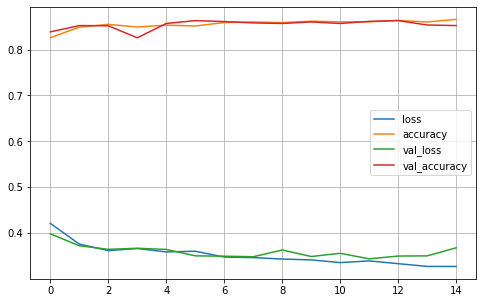

In [65]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


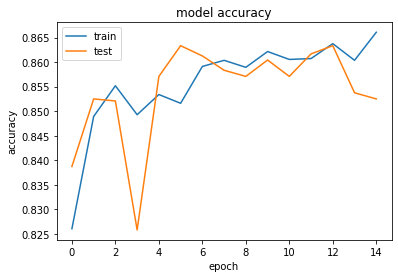

In [73]:
# list all data in history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

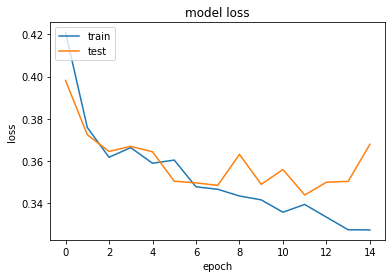

In [74]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Accuracy_score = model.evaluate(X_test, y_test)

In [76]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [77]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [79]:
cm

array([[1559,   36],
       [ 250,  155]], dtype=int64)

In [80]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [81]:
score

0.857